In [30]:
import csv
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [31]:
def plot_features_importances(features_importances, title, features_name):
    # Normalise the importance values
    features_importances = 100.0 * (features_importances / max(features_importances))
    
    # Sort the index values and flip them so that they are arranged in decreasing order of importance
    index_sorted = np.flipud(np.argsort(features_importances))
    
    # Center the location of the labels on the X-axis (for display purposes only)
    pos = np.arange(index_sorted.shape[0]) + 0.5
    
    # Plot the bar graph
    plt.figure()
    plt.bar(pos, features_importances[index_sorted], align='center')
    plt.xticks(pos, features_name[index_sorted])
    plt.ylabel('Relative Importane')
    plt.title(title)
    plt.show()

In [23]:
def load_dataset(filename):
    file_reader = csv.reader(open(filename, 'r'), delimiter=',')
    X, Y = [], []
    for row in file_reader:
        X.append(row[2:13])
        Y.append(row[-1])
        
    # Extract feature names
    feature_names = np.array(X[0])
    
    # Remove the first row because they are feature names
    return np.array(X[1:]).astype(np.float32), np.array(Y[1:]).astype(np.float32), feature_names

In [24]:
X, Y, feature_names = load_dataset("bike_day.csv")
X, Y = shuffle(X, Y, random_state=7)

In [25]:
num_training = int(0.9 * len(X))
X_train, Y_train = X[:num_training], Y[:num_training]
X_test, Y_test = X[num_training:], Y[num_training:]

In [26]:
rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=10)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [27]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
evs = explained_variance_score(Y_test, y_pred)

print("Random Forest Regressor Performance")
print("\nMean squared error = ", round(mse, 2))
print("\nExplained Variance Score = ", round(evs, 2))

Random Forest Regressor Performance

Mean squared error =  365803.02

Explained Variance Score =  0.89


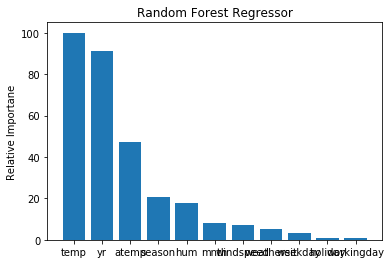

In [33]:
plot_features_importances(rf_regressor.feature_importances_, 'Random Forest Regressor', feature_names)